# Prophet

In [3]:
# Suppress warnings 
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="darkgrid")

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from prophet import Prophet

c:\poetry-venvs\retail-demand-forecasting-aILZzb17-py3.10\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [5]:
TRAIN_RANGE = (datetime(1949, 1, 1), datetime(1958, 12, 1))
TEST_RANGE = (datetime(1959, 1, 1), datetime(1960, 12, 1))

## 1. Read in dataset

In [ ]:
# wget (if available)
# import urllib.request
# url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
# urllib.request.urlretrieve(url, "airline-passengers.csv")


('airline-passengers.csv', <http.client.HTTPMessage at 0x216b34c3760>)

In [9]:
data = pd.read_csv('data/airline-passengers.csv')
data.index = pd.to_datetime(data.Month)  # Set datetime index
data.drop(['Month'], axis=1, inplace=True)

<Axes: title={'center': 'Monthly airline passengers'}, xlabel='Month'>

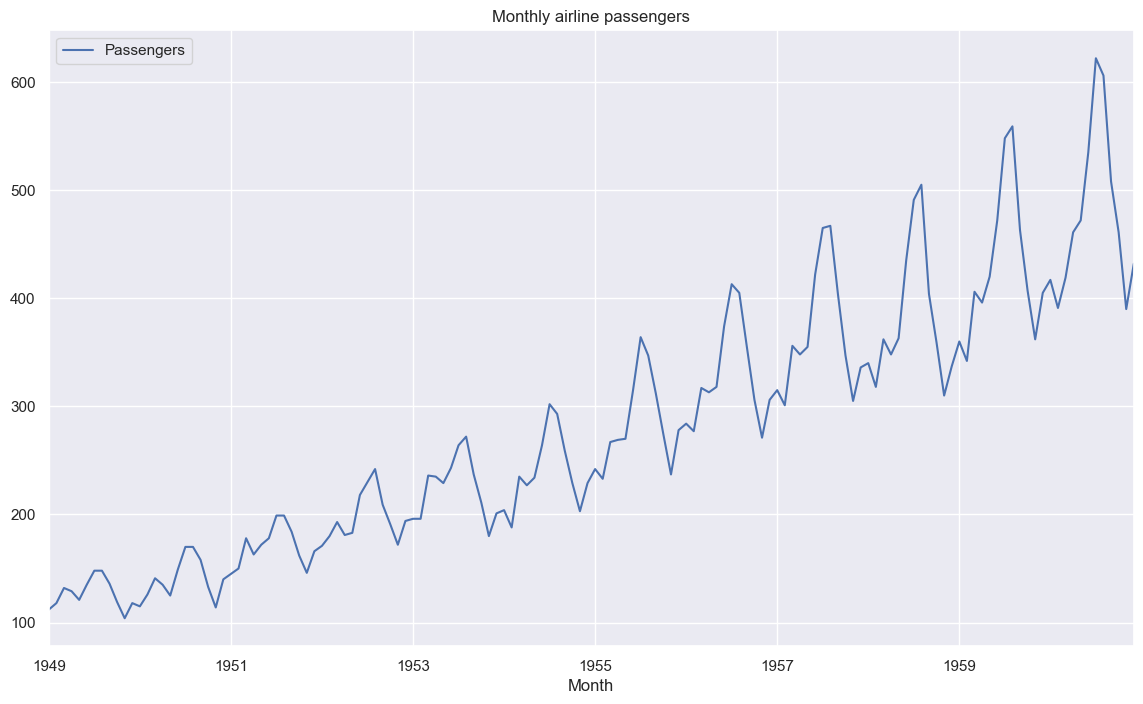

In [10]:
data.plot(figsize=(14, 8), title='Monthly airline passengers')

## 2. Implement Prophet to predict monthly passengers

In [11]:
# Create train dataset
train_df = pd.DataFrame({
    'ds': data[:TRAIN_RANGE[-1]].index, 
    'y': data[:TRAIN_RANGE[-1]]['Passengers'].values})

In [12]:
# Fit prophet model
m = Prophet()
m.fit(train_df)

18:31:08 - cmdstanpy - INFO - Chain [1] start processing
18:31:11 - cmdstanpy - INFO - Chain [1] done processing


In [13]:
# Predict
future = pd.DataFrame({'ds': data.index})
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
139,1960-08-01,521.787299,497.939297,546.357817
140,1960-09-01,482.138155,459.625797,504.681194
141,1960-10-01,449.809109,426.887589,475.815084
142,1960-11-01,421.615207,396.958233,445.067374
143,1960-12-01,447.879442,424.626343,471.159632


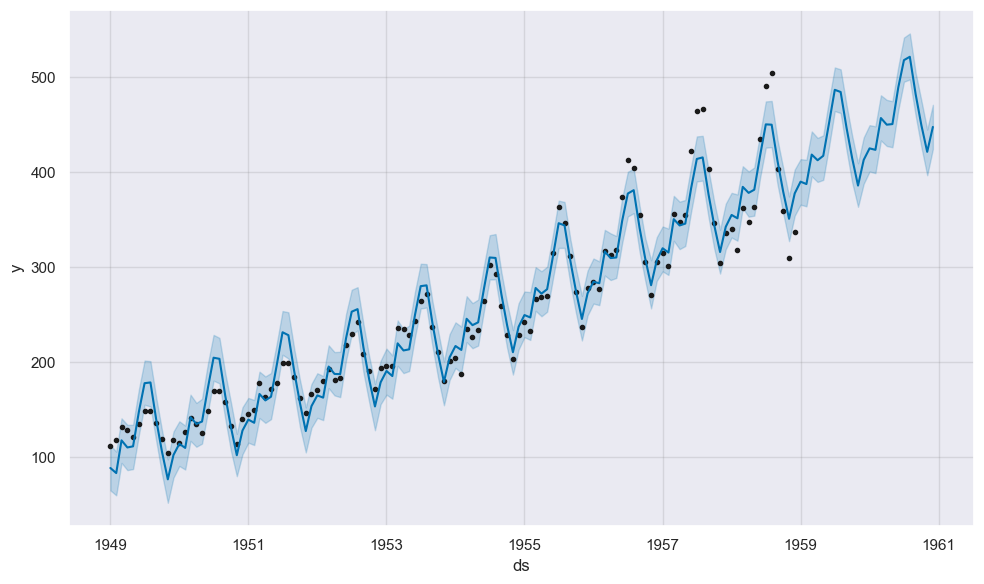

In [14]:
# Prediction result
fig1 = m.plot(forecast)

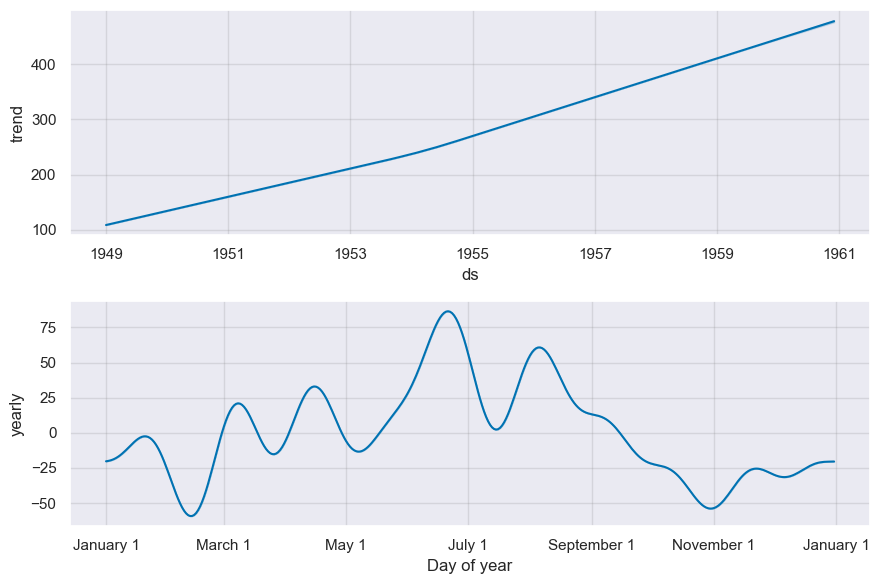

In [15]:
# Plot trend and yearly
fig2 = m.plot_components(forecast)

In [16]:
def evaluate_model(data, forecast):
    """Evaluate trained model by rmse (root mean squared error) and mae (mean absolute error)'"""
    
    pred_df = data.copy()
    pred_train = forecast[forecast['ds'] <= TRAIN_RANGE[-1]]['yhat'].values
    pred_test = forecast[forecast['ds'] >= TEST_RANGE[0]]['yhat'].values
    
    pred_df.loc[:TRAIN_RANGE[-1], 'PredictionTrain'] = pred_train
    pred_df.loc[TEST_RANGE[0]:, 'PredictionTest'] = pred_test
    
    pred_df[['Passengers', 'PredictionTrain', 'PredictionTest']].plot(figsize=(12, 6), title='Predicted monthly airline passengers')
    
    # Evaluate prediction scores of model.
    y_train = pred_df[:TRAIN_RANGE[-1]]['Passengers']
    y_test = pred_df[TEST_RANGE[0]:]['Passengers']
    
    for y, pred, mode in zip([y_train, y_test], [pred_train, pred_test], ['train', 'test']):
        rmse = np.sqrt(mean_squared_error(y, pred))
        mae = mean_absolute_error(y, pred)
        print(f'{mode} rmse: {rmse:.06f}, mae: {mae:.06f}')

train rmse: 18.644609, mae: 14.430800
test rmse: 40.398385, mae: 31.162781


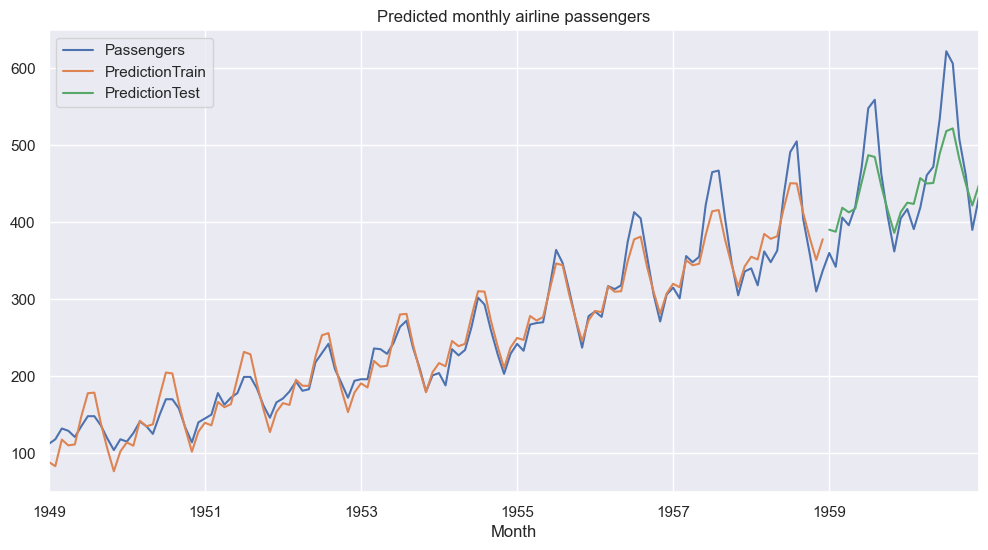

In [17]:
evaluate_model(data, forecast)